<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 31 Class 2</h1> 
    <h3>05/04/21</h3>
</div>

## Objectives for this week:
* Dimensionality Reduction
* Neural Networks
* Models/Templates/Views in Django

## Todays Agenda
* Principle Component Analysis
* Neural Networks
* Perceptrons


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Interview Style Questions For Today</h1> 
</div>

```
Table: Customers

+---------------------+---------+
| Column Name         | Type    |
+---------------------+---------+
| customer_id         | int     |
| customer_name       | varchar |
+---------------------+---------+
customer_id is the primary key for this table.
customer_name is the name of the customer.

 

Table: Orders

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| order_id      | int     |
| customer_id   | int     |
| product_name  | varchar |
+---------------+---------+
order_id is the primary key for this table.
customer_id is the id of the customer who bought the product "product_name".
```

Write an SQL query to report the customer_id and customer_name of customers who bought products "A", "B" but did not buy the product "C" since we want to recommend them buy this product.

Return the result table ordered by customer_id.

The query result format is in the following example.

 
```
Customers table:
+-------------+---------------+
| customer_id | customer_name |
+-------------+---------------+
| 1           | Daniel        |
| 2           | Diana         |
| 3           | Elizabeth     |
| 4           | Jhon          |
+-------------+---------------+

Orders table:
+------------+--------------+---------------+
| order_id   | customer_id  | product_name  |
+------------+--------------+---------------+
| 10         |     1        |     A         |
| 20         |     1        |     B         |
| 30         |     1        |     D         |
| 40         |     1        |     C         |
| 50         |     2        |     A         |
| 60         |     3        |     A         |
| 70         |     3        |     B         |
| 80         |     3        |     D         |
| 90         |     4        |     C         |
+------------+--------------+---------------+

Result table:
+-------------+---------------+
| customer_id | customer_name |
+-------------+---------------+
| 3           | Elizabeth     |
+-------------+---------------+
Only the customer_id with id 3 bought the product A and B but not the product C.
```

In [162]:
import sqlite3

sql_commands = \
"""

DROP TABLE IF EXISTS Customers;
DROP TABLE IF EXISTS Orders;

CREATE TABLE Customers (
 customer_id INTEGER NOT NULL PRIMARY KEY,
 customer_name NVARCHAR(30)
);

CREATE TABLE Orders (
 order_id INTEGER NOT NULL PRIMARY KEY,
 customer_id INTEGER NOT NULL,
 product_name VARCHAR(30)
);

INSERT INTO Customers (customer_id, customer_name ) VALUES ('1', 'Daniel');
INSERT INTO Customers (customer_id, customer_name ) VALUES ('2', 'Diana');
INSERT INTO Customers (customer_id, customer_name ) VALUES ('3', 'Elizabeth');
INSERT INTO Customers (customer_id, customer_name ) VALUES ('4', 'Jhon');

INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('10', '1', 'A');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('20', '1', 'B');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('30', '1', 'D');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('40', '1', 'C');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('50', '2', 'A');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('60', '3', 'A');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('70', '3', 'B');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('80', '3', 'D');
INSERT INTO Orders (order_id, customer_id, product_name) VALUES ('90', '4', 'C');
"""

db = sqlite3.connect('week-31-class.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [163]:
# use this function for your answers.
def with_conn(statement):
    conn = sqlite3.connect('week-31-class.db')
    with conn:
        cur = conn.cursor()
        cur.execute(statement)
        result = cur.fetchall()
        return result

In [164]:
with_conn("SELECT * FROM Customers;")

[(1, 'Daniel'), (2, 'Diana'), (3, 'Elizabeth'), (4, 'Jhon')]

In [165]:
with_conn("SELECT * FROM Orders;")

[(10, 1, 'A'),
 (20, 1, 'B'),
 (30, 1, 'D'),
 (40, 1, 'C'),
 (50, 2, 'A'),
 (60, 3, 'A'),
 (70, 3, 'B'),
 (80, 3, 'D'),
 (90, 4, 'C')]

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Interview Style Questions From Yesterday</h1> 
</div>

# Exercise 1

```
Table: Followers

+-------------+------+
| Column Name | Type |
+-------------+------+
| user_id     | int  |
| follower_id | int  |
+-------------+------+
(user_id, follower_id) is the primary key for this table.
This table contains the IDs of a user and a follower in a social media app where the follower follows the user.

```

Write an SQL query that will, for each user, return the number of followers.

Return the result table ordered by user_id.

The query result format is in the following example:

``` 

Followers table:
+---------+-------------+
| user_id | follower_id |
+---------+-------------+
| 0       | 1           |
| 1       | 0           |
| 2       | 0           |
| 2       | 1           |
+---------+-------------+
Result table:
+---------+----------------+
| user_id | followers_count|
+---------+----------------+
| 0       | 1              |
| 1       | 1              |
| 2       | 2              |
+---------+----------------+
The followers of 0 are {1}
The followers of 1 are {0}
The followers of 2 are {0,1}
```
 


In [15]:
import sqlite3

sql_commands = \
"""
DROP TABLE IF EXISTS Followers;

CREATE TABLE Followers (
 user_id INTEGER NOT NULL,
 follower_id NVARCHAR(10)
);


INSERT into Followers (user_id, follower_id) values ('0', '1');
INSERT into Followers (user_id, follower_id) values ('1', '0');
INSERT into Followers (user_id, follower_id) values ('2', '0');
INSERT into Followers (user_id, follower_id) values ('2', '1');
"""

db = sqlite3.connect('week-31-class.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [16]:
# use this function for your answers.
def with_conn(statement):
    conn = sqlite3.connect('week-31-class.db')
    with conn:
        cur = conn.cursor()
        cur.execute(statement)
        result = cur.fetchall()
        return result

In [17]:
with_conn("SELECT * FROM Followers;")

[(0, '1'), (1, '0'), (2, '0'), (2, '1')]

In [14]:
with_conn("SELECT user_id, count(follower_id) FROM Followers GROUP BY user_id")

[(0, 1), (1, 1), (2, 2)]

# Exercise 2 

X city opened a new cinema, many people would like to go to this cinema. The cinema also gives out a poster indicating the movies’ ratings and descriptions.

Please write a SQL query to output movies with an odd numbered ID and a description that is not 'boring'. Order the result by rating.

 
```
For example, table cinema:

+---------+-----------+--------------+-----------+
|   id    | movie     |  description |  rating   |
+---------+-----------+--------------+-----------+
|   1     | War       |   great 3D   |   8.9     |
|   2     | Science   |   fiction    |   8.5     |
|   3     | irish     |   boring     |   6.2     |
|   4     | Ice song  |   Fantacy    |   8.6     |
|   5     | House card|   Interesting|   9.1     |
+---------+-----------+--------------+-----------+

For the example above, the output should be:

+---------+-----------+--------------+-----------+
|   id    | movie     |  description |  rating   |
+---------+-----------+--------------+-----------+
|   5     | House card|   Interesting|   9.1     |
|   1     | War       |   great 3D   |   8.9     |
+---------+-----------+--------------+-----------+
```

In [18]:
import sqlite3

sql_commands = \
"""
DROP TABLE IF EXISTS Cinema;

CREATE TABLE Cinema (
 id INTEGER NOT NULL PRIMARY KEY,
 movie VARCHAR(255) NOT NULL,
 description VARCHAR(255) NOT NULL,
 rating FLOAT(2,1)
);

INSERT INTO Cinema (id, movie, description, rating) values ('1', 'War', 'great 3d', '8.9');
INSERT INTO Cinema (id, movie, description, rating) values ('2', 'Science', 'fiction', '8.5');
INSERT INTO Cinema (id, movie, description, rating) values ('3', 'irish', 'boring', '6.2');
INSERT INTO Cinema (id, movie, description, rating) values ('4', 'Ice song', 'Fantacy', '8.6');
INSERT INTO Cinema (id, movie, description, rating) values ('5', 'House card', 'Interesting', '9.1');

"""

db = sqlite3.connect('week-31-class.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [19]:
with_conn("SELECT * FROM Cinema")

[(1, 'War', 'great 3d', 8.9),
 (2, 'Science', 'fiction', 8.5),
 (3, 'irish', 'boring', 6.2),
 (4, 'Ice song', 'Fantacy', 8.6),
 (5, 'House card', 'Interesting', 9.1)]

In [23]:
with_conn("SELECT id, movie, description, rating FROM Cinema WHERE id % 2 = 1 AND description='boring'")

[(3, 'irish', 'boring', 6.2)]

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Python Interview Questions</h1> 
</div>

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Dimensionality Reduction</h1> 
</div>

There were three main approaches to unsupervised learning:
* clustering
* anomoly detection
* dimensionality reduction

**"Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable. Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics."**

source: [wikipedia](https://en.wikipedia.org/wiki/Dimensionality_reduction)

Dimensions:
univariate - one variable  
bivariate - two variables  
multivariate - three or more variables  

We can think of dimensions like so.

$\mathbf{R}$ - would be real numbers in one dimension.

$$1.00, 2.32, 5.7 $$

$\mathbf{I}$ - would be integers in one dimension.

$$ 1, 2, 5 $$

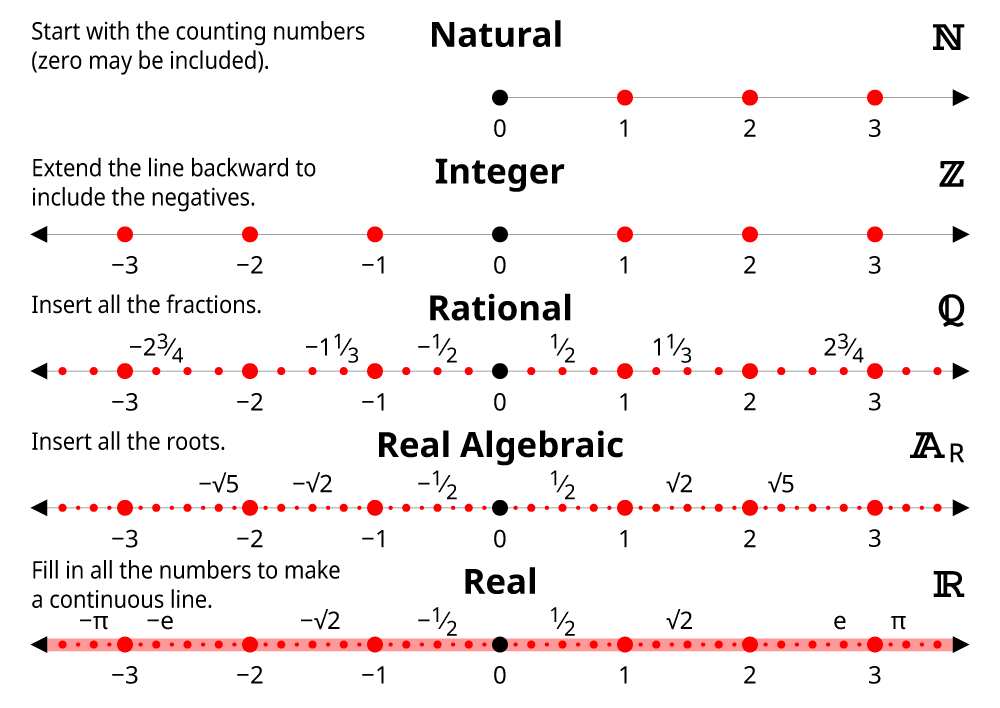

$\mathbf{R^{2}}$ - would be real numbers in two dimensions

$$  (-3.0,1.0), (-1.5,-2.5), (0.0,0.0), (2.0,4.0) $$

$\mathbf{I^2}$ - would be integers in two dimension.

$$ (-3,1), (-1,-2), (0,0), (2,4) $$

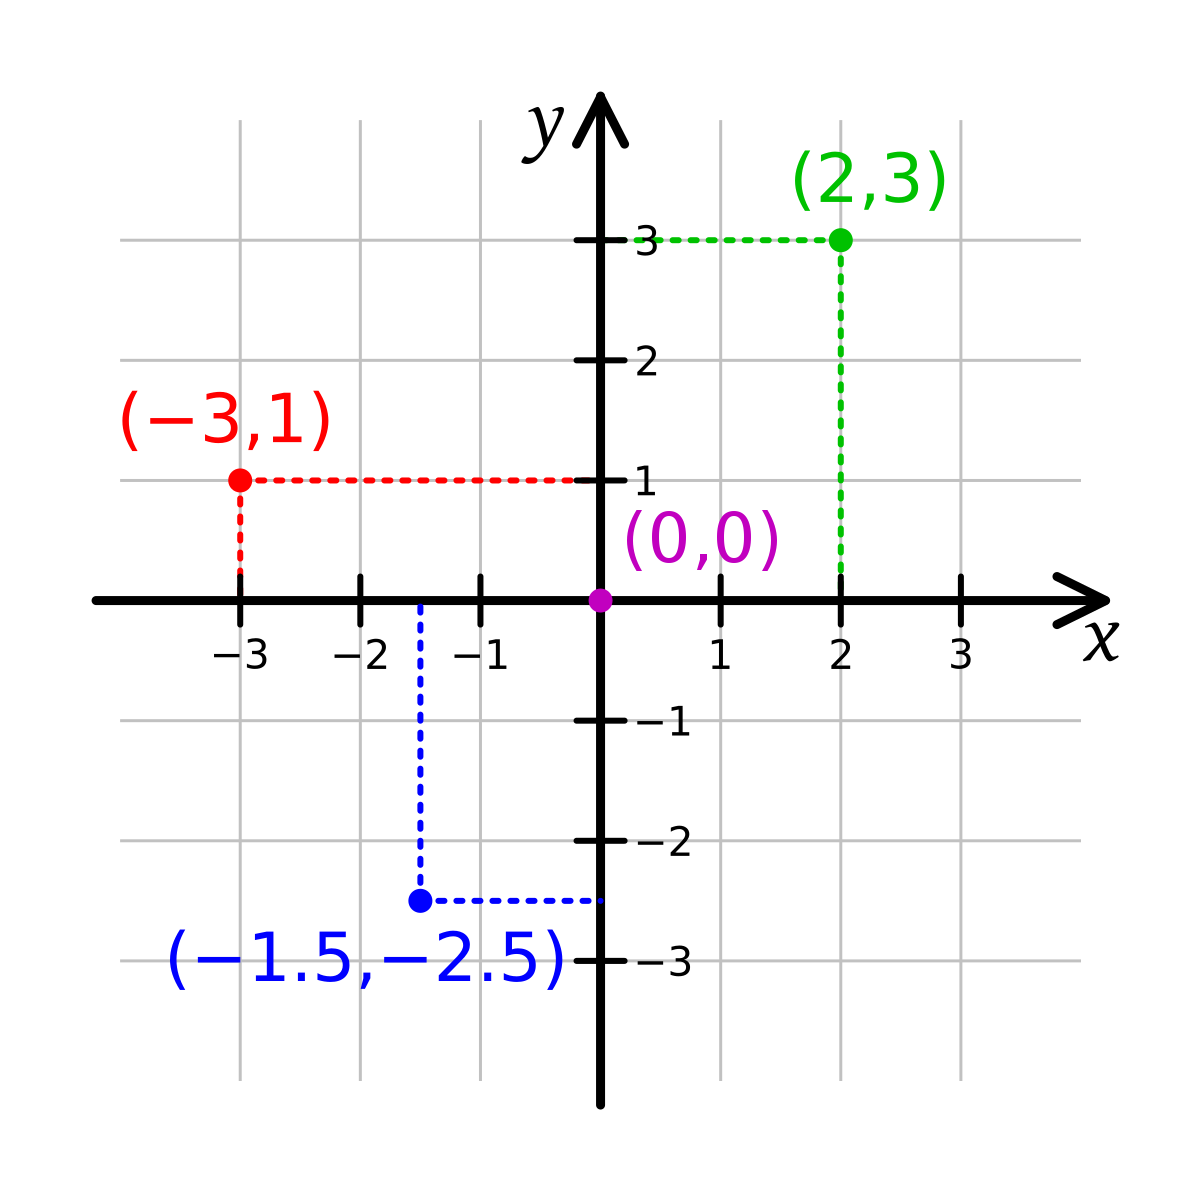

$\mathbf{R^{3}}$ - would be real numbers in three dimensions

$$ (-2.4,3.2,5.4), (1.6,2.4,6.3), (8.0,8.8,8.4) $$

$\mathbf{I^3}$ - would be integers in three dimension.

$$ (-3,1,-2), (-1.5,-2.5,2), (0,0), (2,4) $$

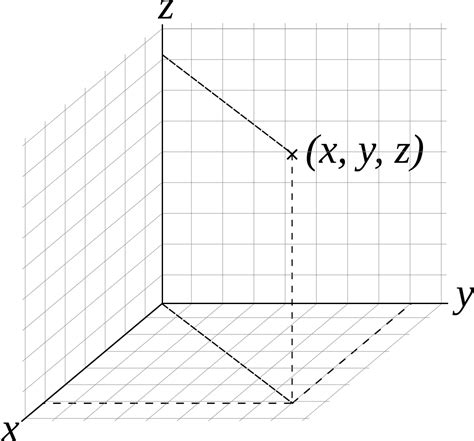

$\mathbf{R^{n}}$ - would be real numbers in $n$ dimensions
$\mathbf{I^n}$ - would be integers in $n$ dimension.

$$ (a_1, a_2, ..., a_n), (b_1, b_2, ..., b_n), (c_1, c_2, ..., c_n) $$

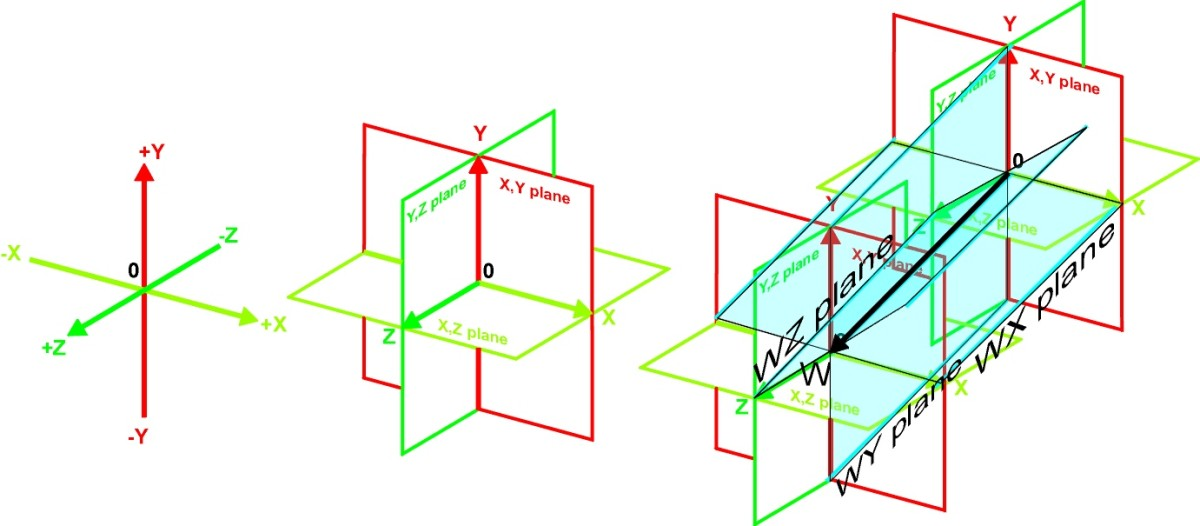

Higher dimensions don't make sense to humans. If we can take higher dimension data and transform it into lower dimensional data, while keeping its intrinsic properties, it will be easier to work with the data.

There is also the **"curse of dimensionality"**. In this context, it means as we have higher dimensions in our features and more complicated data, there is an exponential growth in storage space and processing times. Infinite features would require infinite training. There is also more sparseness in our data.

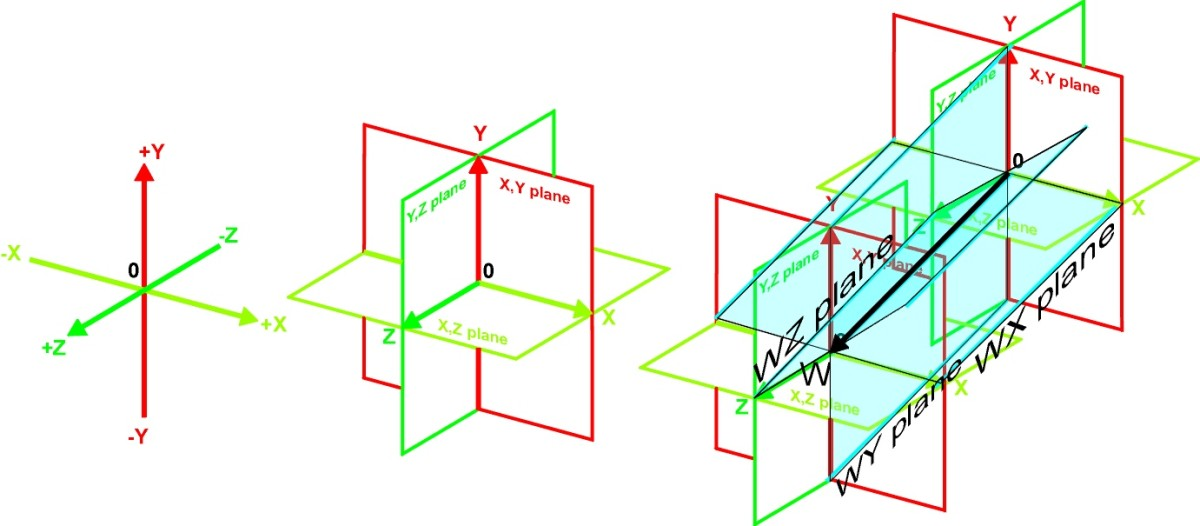

### A simple example of high dimension data cursing us.

[excepted from here](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)

Imagine our dataset consists of the following 8 candies.

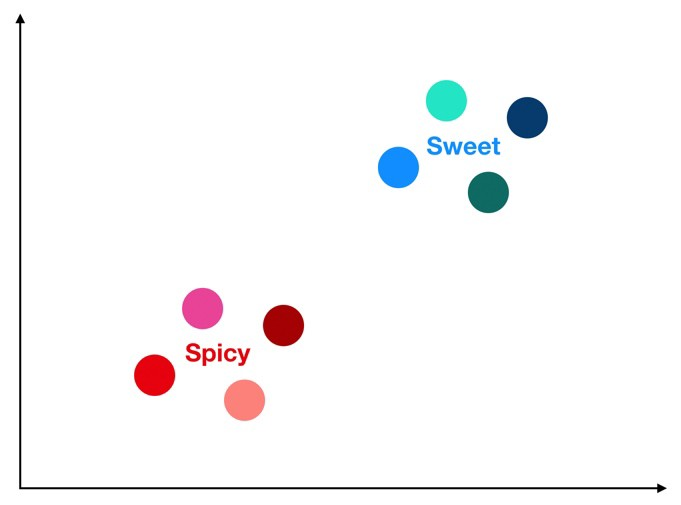

The ground truth is that there are two clusters within our dataset of 8 candies — spicy and sweet. So if all we cared about was getting the flavor right, how could we cluster our candies to ensure that we never accidentally give a spicy candy to our friend with the sweet tooth?

We can cluster by color like so:

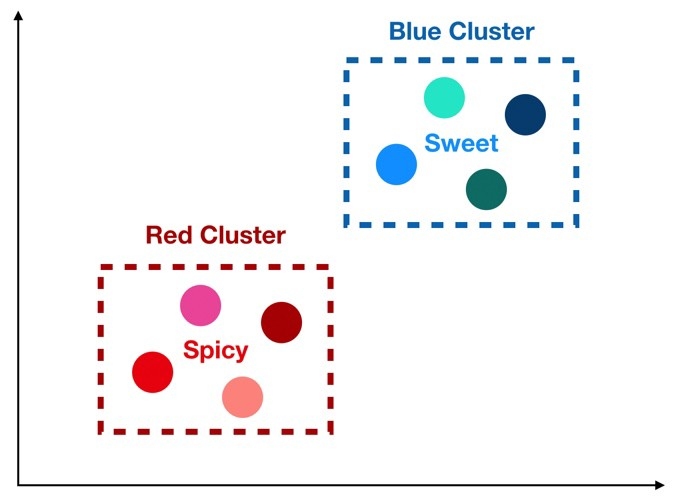

Nice, thanks to our clustering we know that if we eat a reddish candy, it will be spicy; and if we eat a bluish candy, it will be sweet.

But actually it’s not that simple. As humans we are able to visually inspect the candies and quickly decide that red means spicy and blue means sweet. But a machine learning algorithm can only do so if the data is presented to it properly. If our data looks like the following table, then we are in luck — we have two features, reddish and bluish that produce perfect clusters of taste giving us a perfect model.

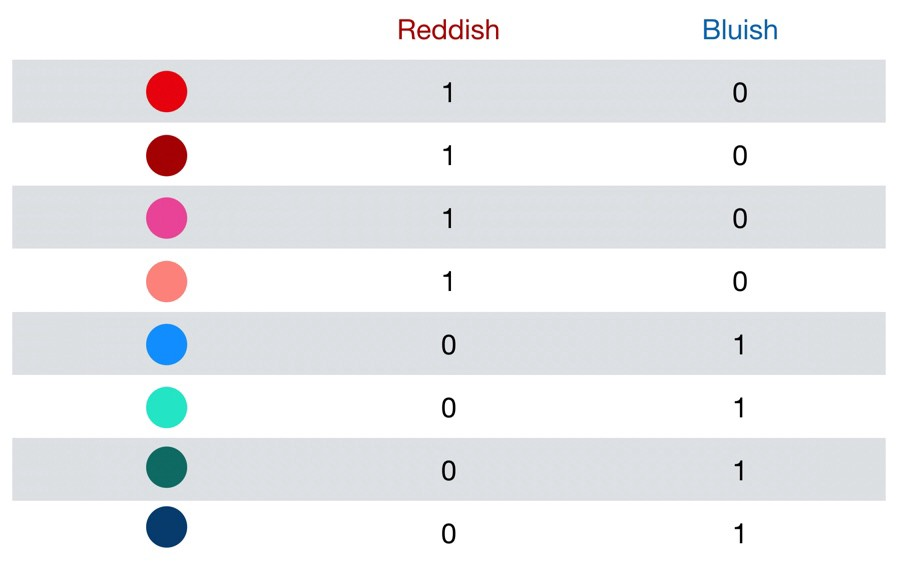

But what if our data is high dimensional like in the next table?

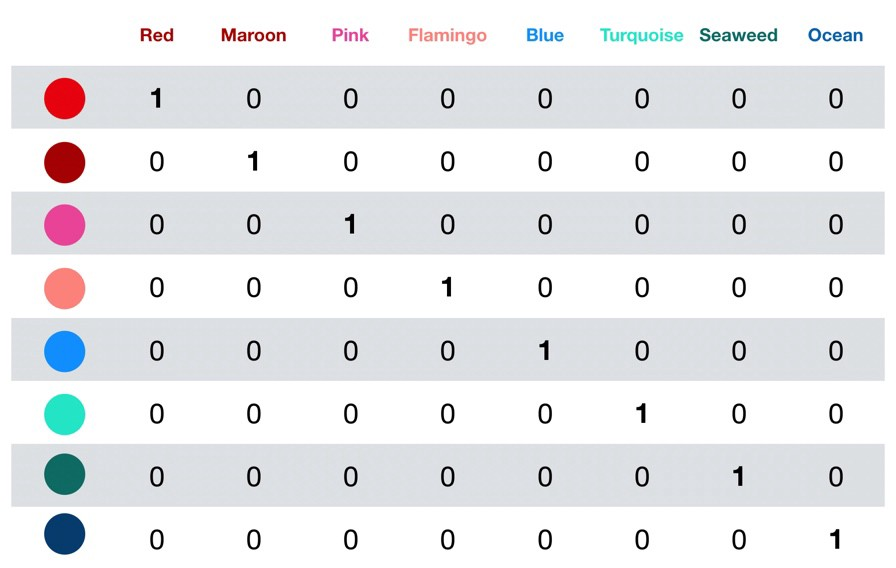

Now instead of 2 categories of colors, we have 8. How would a clustering algorithm likely interpret this? It would look at each candy and make the following conclusions:
* Every candy is its own color.
* As an algorithm (without special training), I do not know the relationships between colors. For example, unlike humans, I do not know that pink is closer to red than turquoise is.
* Given this set of features, I conclude that there are 8 clusters and they are all equally similar to each other.
* I also conclude that out of my 8 clusters, 4 are spicy and 4 are sweet.

That’s not useful at all. It is true that the candies are all different colors but this conclusion leaves us no better off than how we started. Read the last bullet again — it literally just restates what we already knew about our dataset. We have gained zero insight into how to predict whether a given candy will be spicy or sweet.

If we could take our high dimensional data and tranform it into lower dimensional data, we'd be able to spot what we did before.

### What can we use this for?

We have also talked about the curse of dimensionality regarding training models. Too many features and we pick up on noise. Too few features and we're unable to recognize signals in our data. Dimensionality reduction will allow us to do things like reduce features while preventing much of the loss of signals. 

Dimensionality reduction is most often used for:
* feature selection
* feature projection

### Feature Selection

Feature selection is the process of selecting features for use in models. 

We'd like:
* to simplify our models for easier interpretation
* shorter training times
* to avoid the curse of dimensionality
* to enhance generalization by reducing overfitting.

The central premise when using a feature selection technique is that the data contains some features that are either redundant or irrelevant and can be removed without incurring much loss of information. Redundant and irrelevant are two distinct notions, since one relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated.

source [wikipedia](https://en.wikipedia.org/wiki/Feature_selection)  
more information:  
https://machinelearningmastery.com/an-introduction-to-feature-selection/  
https://scikit-learn.org/stable/modules/feature_selection.html  
 

### Feature Extraction

Feature extraction is the process of reducing the number of resources required to describe a large set of data. When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause a classification algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy. Many machine learning practitioners believe that properly optimized feature extraction is the key to effective model construction.

Feature extraction aims to reduce the number of features by creating new features that summarize the old ones.

source [wikipedia](https://en.wikipedia.org/wiki/Feature_extraction)  
more information:  
https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be
https://scikit-learn.org/stable/modules/feature_extraction.html  

### Principle Component Analysis

Principal component analysis (PCA) is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction. It aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one. In the diagram given below, note the directions of maximum variance of data. This is represented using PCA1 (first maximum variance) and PC2 (2nd maximum variance).

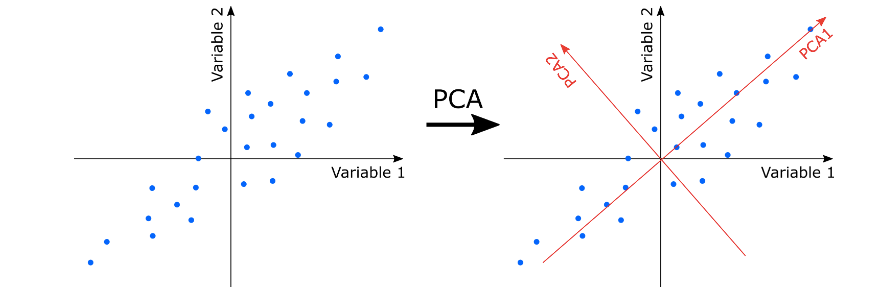

The following is taken from an excellent stackoverflow post  
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579

*Imagine a big family dinner, where everybody starts asking you about PCA. First you explain it to your great-grandmother; then to you grandmother; then to your mother; then to your spouse; finally, to your daughter (who is a mathematician). Each time the next person is less of a layman. Here is how the conversation might go.*

**Great-grandmother: I heard you are studying "Pee-See-Ay". I wonder what that is...**

You: Ah, it's just a method of summarizing some data. Look, we have some wine bottles standing here on the table. We can describe each wine by its colour, by how strong it is, by how old it is, and so on (see this very nice visualization of wine properties taken from here). We can compose a whole list of different characteristics of each wine in our cellar. But many of them will measure related properties and so will be redundant. If so, we should be able to summarize each wine with fewer characteristics! This is what PCA does.

**Grandmother: This is interesting! So this PCA thing checks what characteristics are redundant and discards them?**

You: Excellent question, granny! No, PCA is not selecting some characteristics and discarding the others. Instead, it constructs some new characteristics that turn out to summarize our list of wines well. Of course these new characteristics are constructed using the old ones; for example, a new characteristic might be computed as wine age minus wine acidity level or some other combination like that (we call them linear combinations).

In fact, PCA finds the best possible characteristics, the ones that summarize the list of wines as well as only possible (among all conceivable linear combinations). This is why it is so useful.

**Mother: Hmmm, this certainly sounds good, but I am not sure I understand. What do you actually mean when you say that these new PCA characteristics "summarize" the list of wines?**

You: I guess I can give two different answers to this question. First answer is that you are looking for some wine properties (characteristics) that strongly differ across wines. Indeed, imagine that you come up with a property that is the same for most of the wines. This would not be very useful, would it? Wines are very different, but your new property makes them all look the same! This would certainly be a bad summary. Instead, PCA looks for properties that show as much variation across wines as possible.

The second answer is that you look for the properties that would allow you to predict, or "reconstruct", the original wine characteristics. Again, imagine that you come up with a property that has no relation to the original characteristics; if you use only this new property, there is no way you could reconstruct the original ones! This, again, would be a bad summary. So PCA looks for properties that allow to reconstruct the original characteristics as well as possible.

Surprisingly, it turns out that these two aims are equivalent and so PCA can kill two birds with one stone.

**Spouse: But darling, these two "goals" of PCA sound so different! Why would they be equivalent?**

You: Hmmm. Perhaps I should make a little drawing (takes a napkin and starts scribbling). Let us pick two wine characteristics, perhaps wine darkness and alcohol content -- I don't know if they are correlated, but let's imagine that they are. Here is what a scatter plot of different wines could look like:

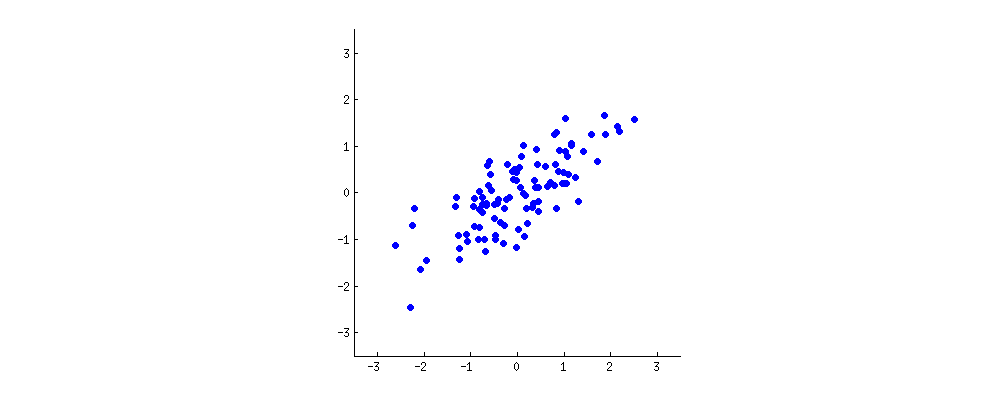

Each dot in this "wine cloud" shows one particular wine. You see that the two properties (x and y on this figure) are correlated. A new property can be constructed by drawing a line through the center of this wine cloud and projecting all points onto this line. This new property will be given by a linear combination $w_1x+w_2y$, where each line corresponds to some particular values of $w_1$ and $w_2$.

Now look here very carefully -- here is how these projections look like for different lines (red dots are projections of the blue dots):

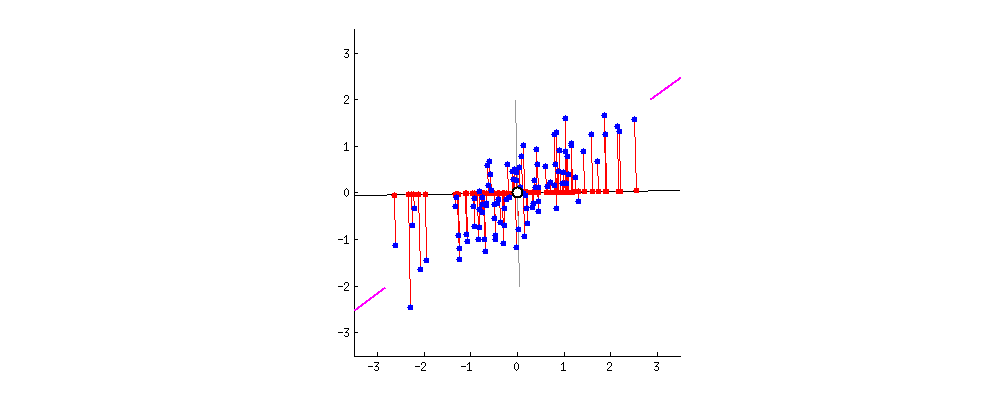

As I said before, PCA will find the "best" line according to two different criteria of what is the "best". First, the variation of values along this line should be maximal. Pay attention to how the "spread" (we call it "variance") of the red dots changes while the line rotates; can you see when it reaches maximum? Second, if we reconstruct the original two characteristics (position of a blue dot) from the new one (position of a red dot), the reconstruction error will be given by the length of the connecting red line. Observe how the length of these red lines changes while the line rotates; can you see when the total length reaches minimum?

If you stare at this animation for some time, you will notice that "the maximum variance" and "the minimum error" are reached at the same time, namely when the line points to the magenta ticks I marked on both sides of the wine cloud. This line corresponds to the new wine property that will be constructed by PCA.

By the way, PCA stands for "principal component analysis" and this new property is called "first principal component". And instead of saying "property" or "characteristic" we usually say "feature" or "variable".

**Daughter: Very nice, papa! I think I can see why the two goals yield the same result: it is essentially because of the Pythagoras theorem, isn't it? Anyway, I heard that PCA is somehow related to eigenvectors and eigenvalues; where are they on this picture?**

You: Brilliant observation. Mathematically, the spread of the red dots is measured as the average squared distance from the center of the wine cloud to each red dot; as you know, it is called the variance. On the other hand, the total reconstruction error is measured as the average squared length of the corresponding red lines. But as the angle between red lines and the black line is always 90∘
, the sum of these two quantities is equal to the average squared distance between the center of the wine cloud and each blue dot; this is precisely Pythagoras theorem. Of course this average distance does not depend on the orientation of the black line, so the higher the variance the lower the error (because their sum is constant). This hand-wavy argument can be made precise ([see here](https://stats.stackexchange.com/a/136072/28666)).

By the way, you can imagine that the black line is a solid rod and each red line is a spring. The energy of the spring is proportional to its squared length (this is known in physics as the Hooke's law), so the rod will orient itself such as to minimize the sum of these squared distances. I made a simulation of how it will look like, in the presence of some viscous friction:

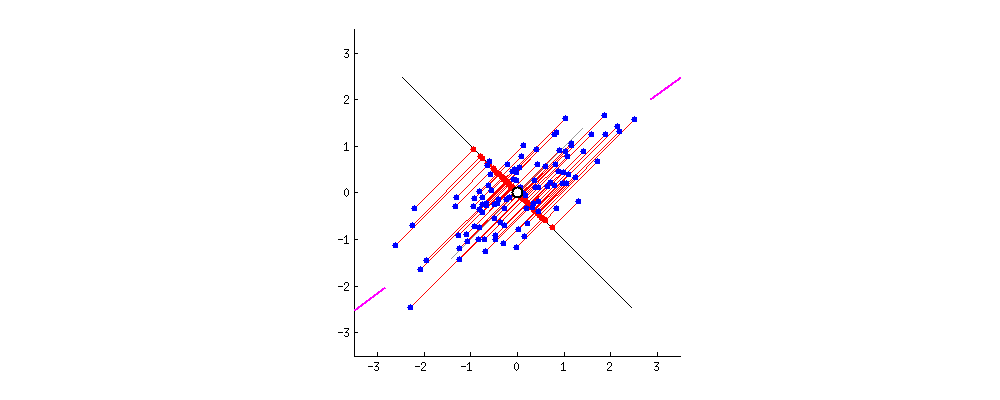

Regarding eigenvectors and eigenvalues. You know what a covariance matrix is; in my example it is a $2×2$ matrix that is given by

$$ \begin{pmatrix}
1.07 & 0.63 \\
0.63 & 0.64 \\
\end{pmatrix} $$.

What this means is that the variance of the $x$ variable is $1.07$, the variance of the $y$ variable is $0.64$, and the covariance between them is $0.63$. As it is a square symmetric matrix, it can be diagonalized by choosing a new orthogonal coordinate system, given by its eigenvectors (incidentally, this is called spectral theorem); corresponding eigenvalues will then be located on the diagonal. In this new coordinate system, the covariance matrix is diagonal and looks like that:

$$ \begin{pmatrix}
1.52 & 0 \\
0 & 0.19 \\
\end{pmatrix}$$,

meaning that the correlation between points is now zero. It becomes clear that the variance of any projection will be given by a weighted average of the eigenvalues (I am only sketching the intuition here). Consequently, the maximum possible variance $(1.52)$ will be achieved if we simply take the projection on the first coordinate axis. It follows that the direction of the first principal component is given by the first eigenvector of the covariance matrix. ([More details here.](https://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit))

You can see this on the rotating figure as well: there is a gray line there orthogonal to the black one; together they form a rotating coordinate frame. Try to notice when the blue dots become uncorrelated in this rotating frame. The answer, again, is that it happens precisely when the black line points at the magenta ticks. Now I can tell you how I found them: they mark the direction of the first eigenvector of the covariance matrix, which in this case is equal to $(0.81,0.58)$.

PCA can be broken down into four steps:
1. We identify the relationship among features through a **Covariance Matrix**
2. Through the linear transformation or eigendecomposition of the Covariance Matrix, we get eigenvectors and eigenvalues.
3. Then we transform our data using Eigenvectors into principle components.
4. Lastly, we quantify the importance of these relationships using Eigenvalues and keep the important principal components.

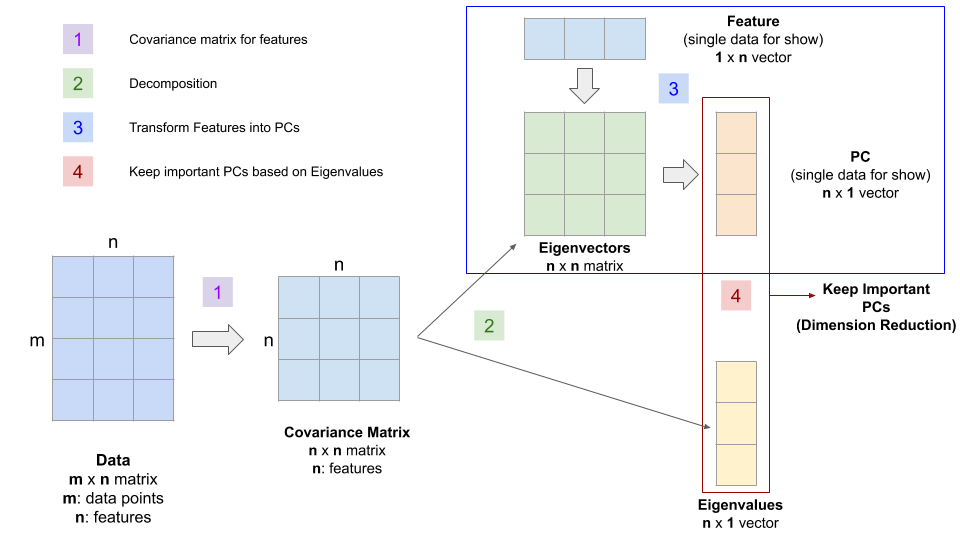
[source](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)

A Simplified Visual Demo

The following demo presents the linear transformation between features and principal components using eigenvectors for a single data point from the Iris database. I describe the calculations without using any linear algebra terms. However, it would be helpful if you understand the dot product between two vectors (since we demonstrate the transformation for a single data point) and matrix multiplication (when we transform all data points).

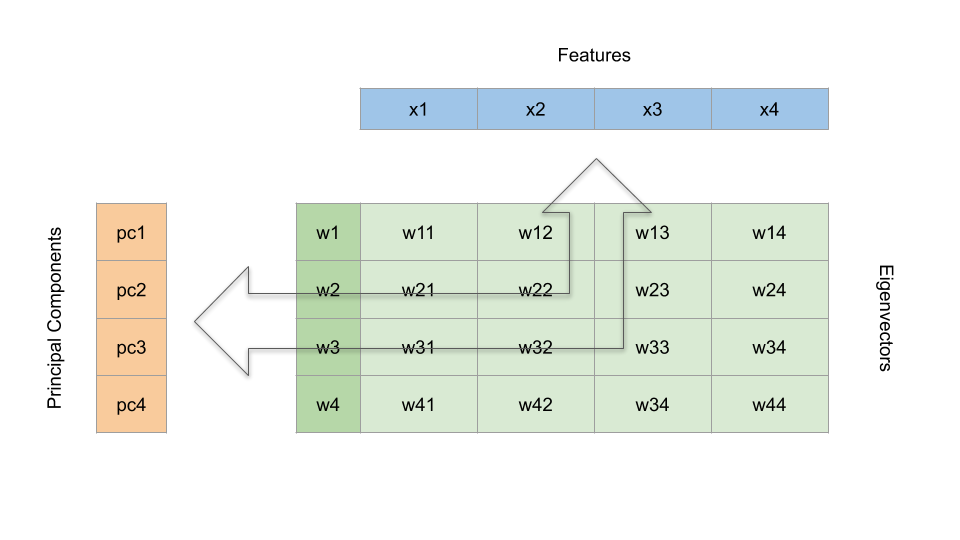

1. **Features:** represented by the blue horizontal on the top. Note that x1, x2, x3, and x4 represents the four features of a single iris (i.e., sepal length, sepal width, petal length, and petal width), not four different irises.
2. **Eigenvectors:** represented by green matrix
3. **Principal Components:** represented by the orange vertical bar to the left

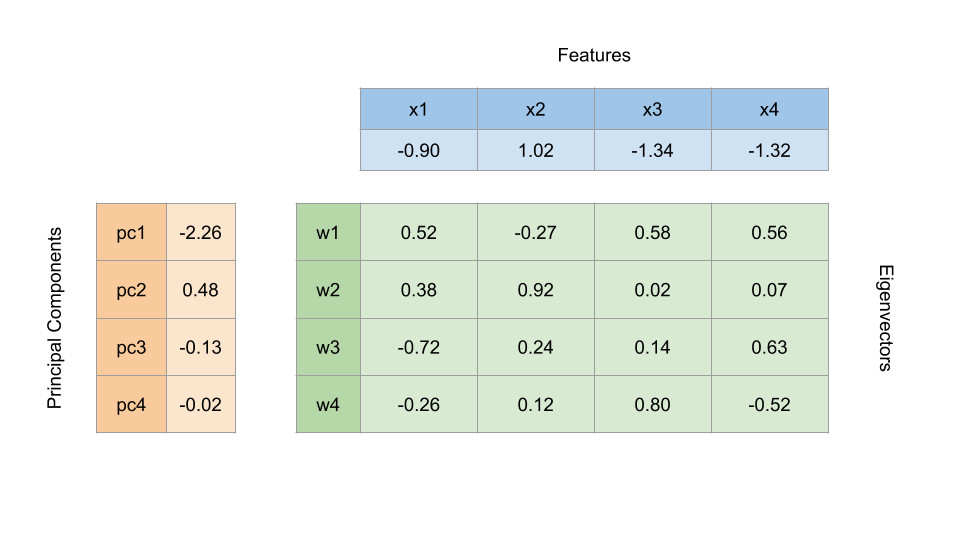

Figure 3 includes the values for each part. One of the best ways to learn and understand a mathematical method is to validate that the numbers add up. From here, we are going to do some simple calculations.

Visual Demo for Step 3

1. Transform Features into Principal Components.
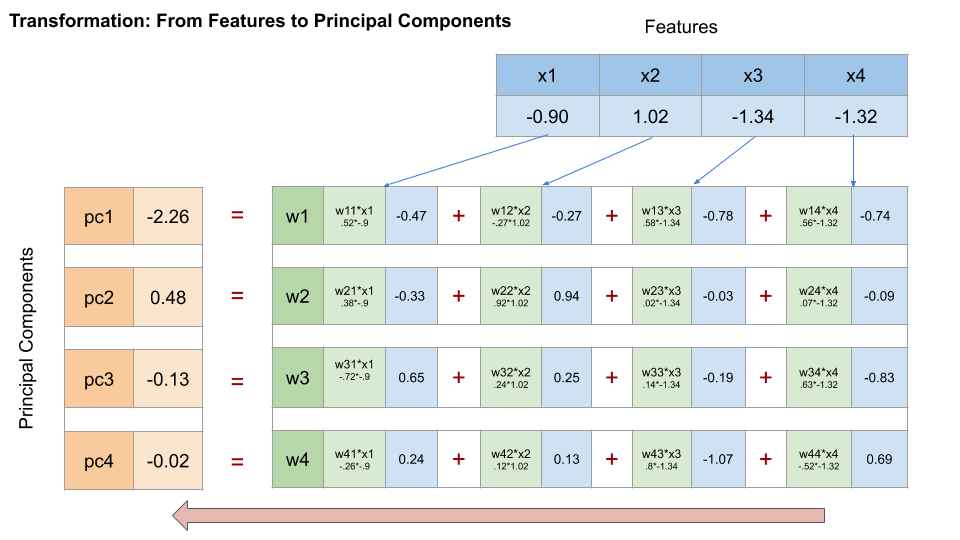

To transform the features into principal components, we multiply the features with the eigenvectors element by element, as shown in the figure above, and then add them in the horizontal direction.

2. Transform Princple Components back into Features.
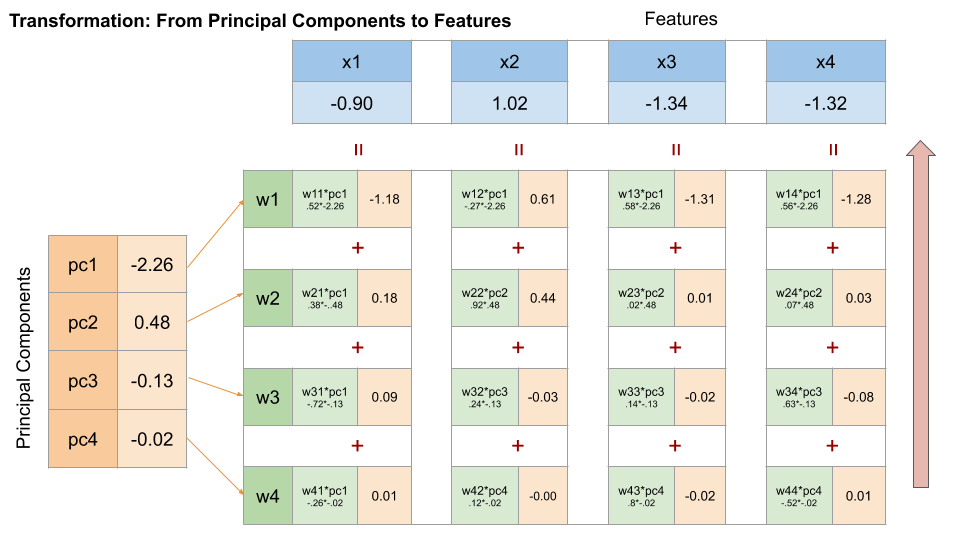

Well, you can certainly transform the principal components back into the original features by performing the calculation shown in the figure above.

Visual Demo for Step 4

After visualizaing the math behind the transformation, let's demonstrate the difference between feature elimination and feature extraction.

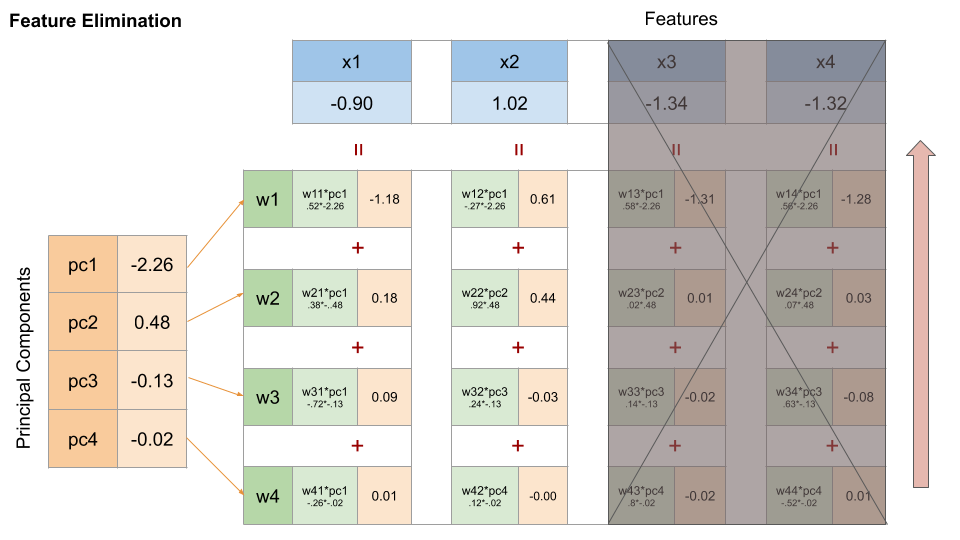

As shown in the figure above, if we choose to reduce dimensionality through feature elimination, we remove some features entirely, in this case, `x3` and `x4`. All information provided by petal length and petal width is lost when we reduce the dimension from 4 to 2.

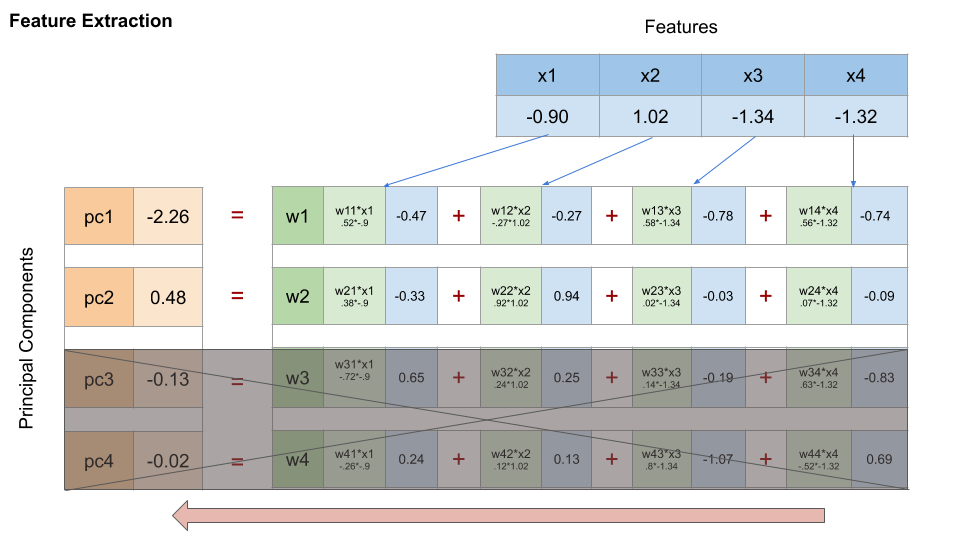

In contrast, when we reduce dimensionality through feature extraction methods such as PCA, we keep the most important information by selecting the principal components that explain most of the relationships among the features. Here is where the eigenvalues kick in and help us learn how much information each principal component contains.

In our case, the first and second principal components (i.e., pc1 and pc2) explained more than 95% of the variation from the features based on the normalized eigenvalue associated with each eigenvector, as shown in Figure 8 below. Therefore, we only keep pc1 and pc2.
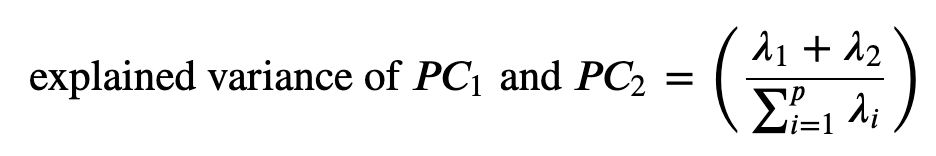

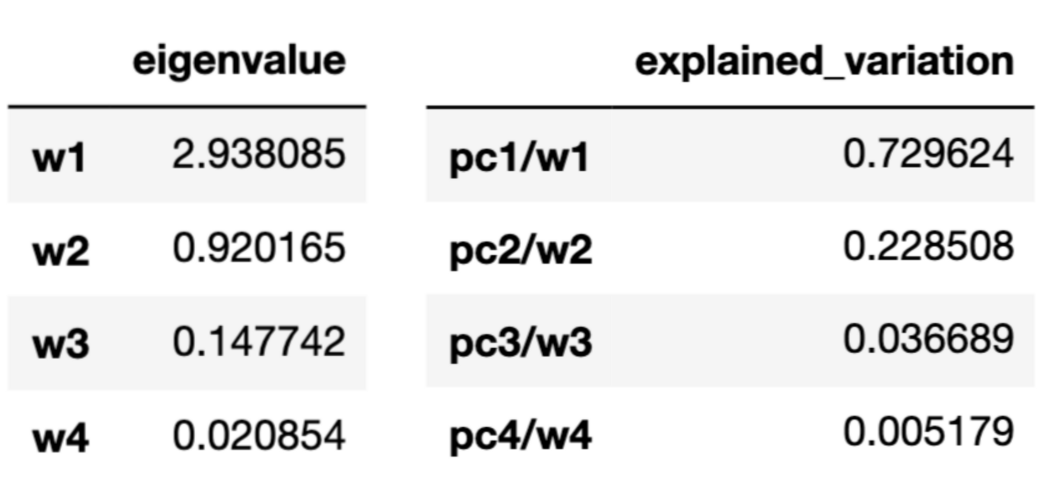

Note:
* that each of the principal components contains information from all four features. By keeping only `pc1` and `pc2`, we extract the most important information from all four features and reduce the dimension from 4 to 2.
* Data cleaning is important. PCA is sensitive to outliers and missing values
* Standardize data. PCA uses Euclidean distance as its feature vector similarity metric, so make sure we scale the features before applying PCA.
* Because we reduce dimensions and drop original features, we aren't able to interpret them and their impact.

**We'll be seeing an example of K-Means clustering using PCA.**

This journal article discusses the benefits of using the two together ([link](http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf)) but in general, we can see benefits from utilizing PCA with some of our machine learning algorithms.

# Principle components visualized

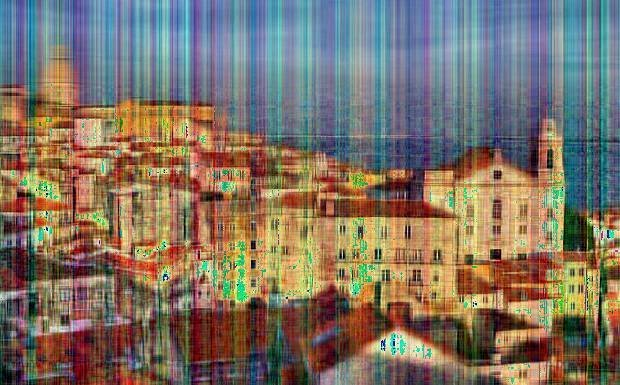  
The city of Lisbon, in 26 principal components.

https://setosa.io/ev/principal-component-analysis/

In [5]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [10]:
data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

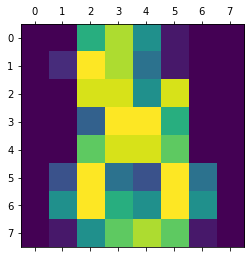

In [9]:
plt.matshow(data[1796].reshape(8,8))

# Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:
* create a pipeline which will scale the data using a StandardScaler;
* train and time the pipeline fitting;
* measure the performance of the clustering obtained via different metrics.

In [11]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    # this sets time 0 to current time
    t0 = time()
    
    # this creates a pipeline
    # that scales our data using StandardScaler - scaling it to normal distribution 
    # then runs it through kmeans
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    
    # this calculates the time taken to fit 
    
    fit_time = time() - t0
    
    # this produces the results 
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    
    # this adds to the results the calculated metrics we just defined
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

# Run the benchmark

We will compare three approaches:
* an initialization using kmeans++. This method is stochastic and we will run the initialization 4 times;
* a random initialization. This method is stochastic as well and we will run the initialization 4 times;
* an initialization based on a PCA projection. Indeed, we will use the components of the PCA to initialize KMeans. This method is deterministic and a single initialization suffice.


In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

# this runs a special version of kmeans meant to choose better initial cluster centers
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)

# this uses that to benchmark
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

# chooses random initial cluster centers
kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

# this runs a PCA on our data
pca = PCA(n_components=n_digits).fit(data)

# this uses the PCA components as the initial cluster centers
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.137s	69662	0.680	0.719	0.699	0.570	0.695	0.183
random   	0.082s	69707	0.675	0.716	0.694	0.560	0.691	0.167
PCA-based	0.033s	72686	0.636	0.658	0.647	0.521	0.643	0.135
__________________________________________________________________________________


# Visualize the results on PCA-reduced data

PCA allows to project the data from the original 64-dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.

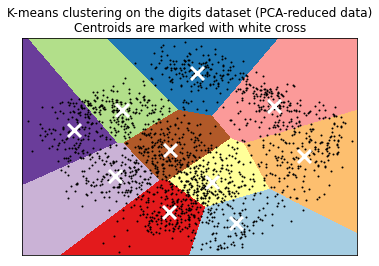

In [13]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Neural Networks</h1> 
</div>

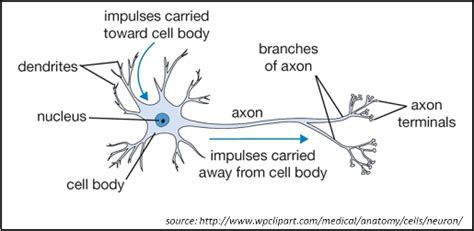

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

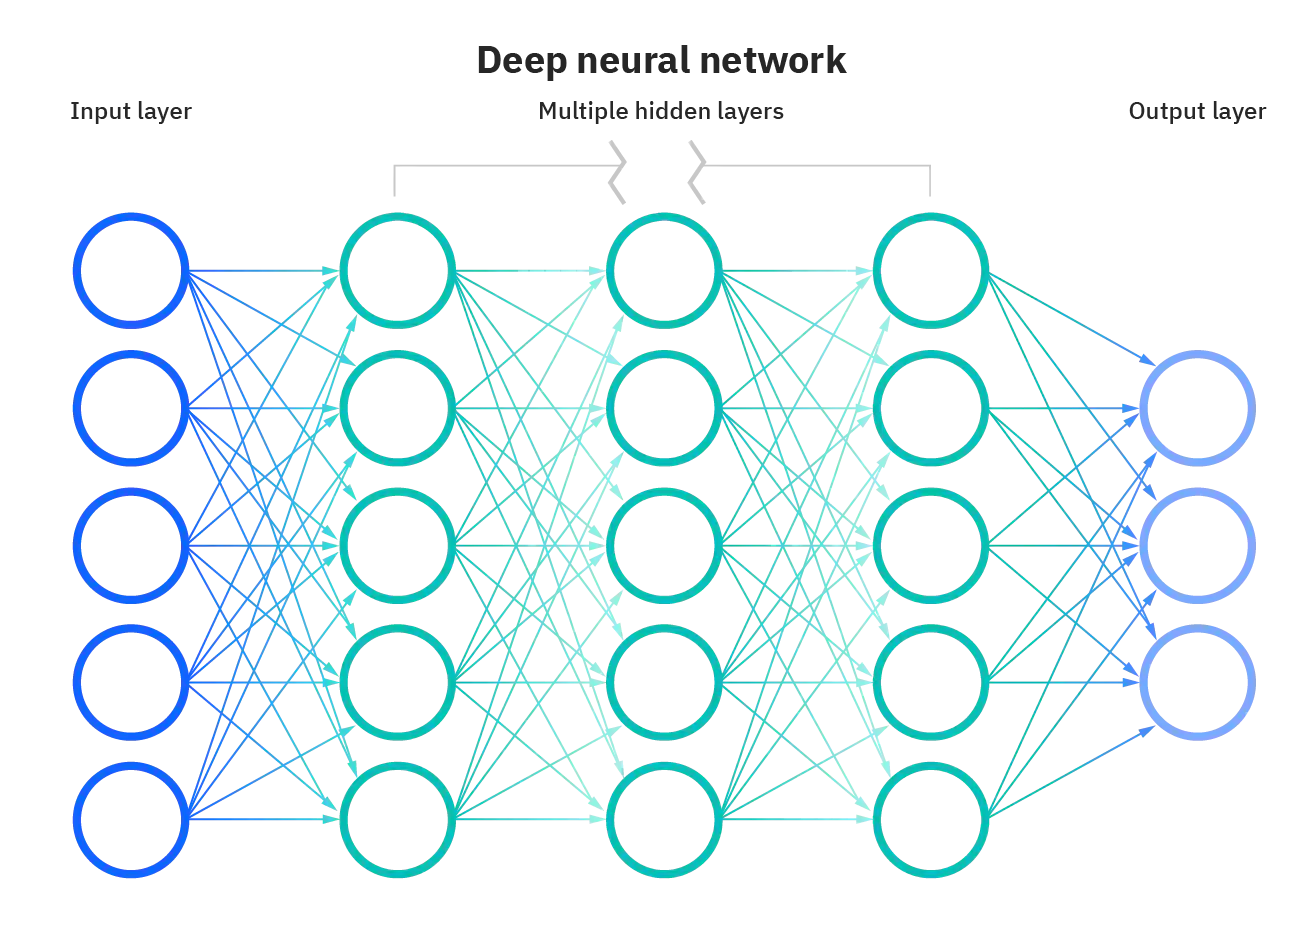

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

source: [ibm](https://www.ibm.com/cloud/learn/neural-networks)

# Perceptrons

The perceptron algorithm was invented in 1958 by Frank Rosenblatt at the Cornell Aeronautical Laboratory. It was initially intended to be a machine however its first implementation was in software for the IBM 704.

A perceptron is an algorithm for supervised learning of binary classifers. A binary classifier is a function that can decide whether or not an input, represented by a vector of numbers, belongs to a specific class. It is a type of linear classifier (similar to logistic regressions) that makes predictions based on a linear predictor function combining a set of weights with the feature vector.

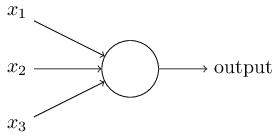

A perceptron is a threshold function, that maps its input $x$ to an output value $f(x)$. Essentially, a perceptron takes several binary inputs, $x_1, x_2,...$, and produces a single binary output.

$$ f(x)=\begin{cases}
1 & \text{if} \quad w\cdot x + b > 0\\
0 & \text{otherwise}\\
\end{cases}$$

where $w$ is a vector of real-valued weights, $w \cdot x$ is the dot product $\sum_{i=1}^{m}{w_ix_i}$ and $b$ is the bias

Similar to logistic regressions where we classified inputs into outputs if the result of the calculations were above a determined level, a perceptron will choose its binary output based on some level.

Below is an example of a learning algorithm for a single-layer perceptron. As more training examples are considered, the perceptron updates its linear boundary as it "learns".

### Perceptron Algorithm

Some definitions needed:
* `r` - Learning rate of perceptron. Between 0 and 1. Larger values make the weight changes more volatile
* $y=f(z)$ - denotes the output from the perceptron for an input vector $z$.
* $D = {(x_1,d_1),...,(x_s,d_s)}$ is the training set of $s$ samples, where:
  - $x_j$ is the $n$-dimensional input vector
  - $d_j$ is the desired output value of the perceptron for that input
* The values of the features are as follows:
  - $x_{j,i}$ denotes the $i$th feature of the $j$th training input vector
  - $x_{j,0} = 1$
* To represent the weights:
  - $w_i$ is the $i$the value in the weight vector, to be multiplied by the value of the $i$th input feature
  - because $x_{j,0}=1$, the $w_0$ is effectively a bias that we use instead of the bias constant $b$
* To show the time-dependence of $w$, we use:
  - $w_i(t)$, the weight $i$ at time $t$
  
Steps:
1. Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0.
2. For each example $j$ in our training set $D$, perform the following steps over the input $x_j$ and desired output $d_j$:
  a. Calculate the actual output:
  $$y_j(t) = f[w(t)\cdot x_j]$$
  $$y_j(t) = f[w_0(t)x_{j,0} + w_1(t)x_{j,1} +  w_2(t)x_{j,2} + ... +  w_n(t)x_{j,n}$$
  b. Update the weights:
    - $ w_i(t+1) = w_i(t) + r \cdot (d_j-y_j(t))x_{j,i}$ for all features
    - $ 0 <= i <= n$, $r$ is the learning rate

training set: 
	data: (0, 0) expected result: 0 
	data: (0, 1) expected result: 1 
	data: (1, 0) expected result: 1 
	data: (1, 1) expected result: 1 

dataframe:
    x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

training
epoch: 0
	weights:[0.7675508  0.88839597]
	errors: []
epoch: 1
	weights:[0.7675508  1.38839597]
	errors: [-1, 1, 0, 0]
epoch: 2
	weights:[1.2675508  1.38839597]
	errors: [-1, 0, 1, 0]
epoch: 3
	weights:[1.2675508  1.38839597]
	errors: [-1, 0, 0, 0]
epoch: 4
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]
epoch: 5
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]
epoch: 6
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]
epoch: 7
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]
epoch: 8
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]
epoch: 9
	weights:[1.2675508  1.38839597]
	errors: [0, 0, 0, 0]


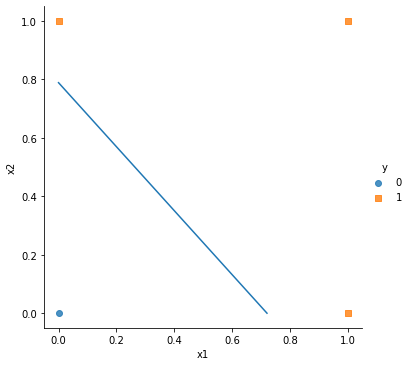

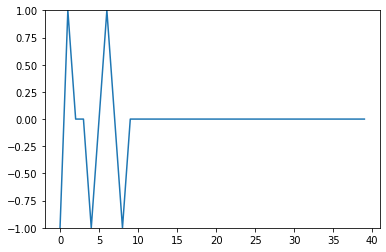

In [19]:
import random

r = 0.01
training_set = [((0,0), 0), ((0,1), 1), ((1,0), 1), ((1,1),1)]
num_samples = len(training_set)
x1 = [training_set[i][0][0] for i in range(num_samples)]
x2 = [training_set[i][0][1] for i in range(num_samples)]
y =  [training_set[i][1] for i in range(num_samples)]

df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y' : y
})

printable_training_set = "\n\t".join([f"data: {sample[0]} expected result: {sample[1]} " for sample in training_set])

print(f"training set: \n\t{printable_training_set}\n")
print(f"dataframe:\n {df}\n")

sns.lmplot(x="x1", y="x2", data=df, fit_reg=False, hue="y", markers=['o', 's'])

step_function = lambda x: 0 if x < 0 else 1

# set parameters
weights = np.random.rand(2)
errors = []
learning_rate = 0.5
epoch = 10
bias = 0
print("training")
for i in range(epoch):
    print(f"epoch: {i}")
    print(f"\tweights:{weights}")
    print(f"\terrors: {errors[-4:]}")
    for x, y in training_set:      
        # calculate output
        u = sum(x*weights) + bias
        
        # calculate error
        error = y - step_function(u) 
        errors.append(error) 
        
        # update weights and bias
        for index, value in enumerate(x):
            weights[index] += learning_rate * error * value
            bias += learning_rate*error
            
# final decision boundary
a = [0,-bias/weights[1]]
c = [-bias/weights[0],0]
plt.plot(a,c)


# ploting errors   
plt.figure(2)
plt.ylim([-1,1]) 
plt.plot(errors)
plt.show()

Issues with Perceptrons:
* Convergence - perceptrons are linear classifiers therefore it will not get to the state with all the input vectors classified correctly if the training set $D$ is not linearly separable. Meaning positive examples cannot be separated from negative examples by a hyperplane.

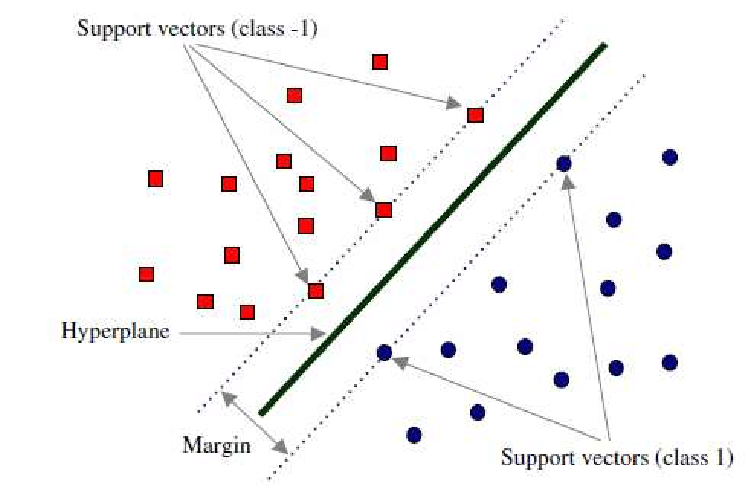

The reason why "support vector" is mentioned in the above image is because support vector machines were created to deal with the linearly separable constraint on perceptrons.

Required Reading:  
http://neuralnetworksanddeeplearning.com/chap1.html

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; ">
    <h1>Django Code Along</h1> 
</div>